# 프로젝트 7: 고양이 수염 스티커 만들기

라이브러리 버전 확인

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**사진 불러오기**

<function matplotlib.pyplot.show>

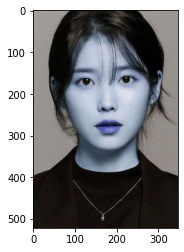

In [7]:
my_image_path = '/content/drive/MyDrive/camera_sticker/images/iuu.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show

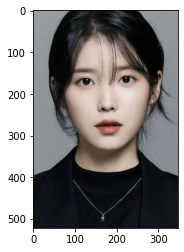

In [8]:
# plt.imshwo 이전에 RGB 이미지로 바꾼다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

얼굴 검출하기

In [9]:
# detector를 선언한다.
detector_hog = dlib.get_frontal_face_detector()

# bounding box를 추출한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)

rectangles[[(68, 118) (291, 341)]]


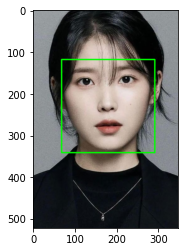

In [10]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**랜드마크 검출 하기**

In [22]:
model_path = '/content/drive/MyDrive/camera_sticker/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [12]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    #  face landmark 좌표를 저장해둔다.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


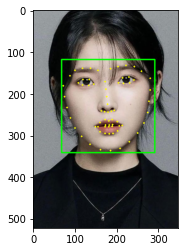

In [13]:
for landmark in list_landmarks:
  for point in landmark:
      cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [14]:
# 좌표 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])   # 코의 index는 30이다.
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d, %d)'%(x,y))
    print('(w,h) : (%d, %d)'%(w,h))

(178, 225)
(x,y) : (178, 113)
(w,h) : (224, 224)


**스티커 적용하기**

In [15]:
sticker_path = '/content/drive/MyDrive/camera_sticker/sticker.png'
img_sticker = cv2.imread(sticker_path)  # 스티커 이미지를 불러온다.
img_sticker = cv2.resize(img_sticker,(w,h))
print(img_sticker.shape)

(224, 224, 3)


In [16]:
refined_x = x - w // 2
refined_y = h - y
print('(x,y) : (%d, %d)'%(refined_x, refined_y))

(x,y) : (66, 111)


In [17]:
# -y 크기만큼 이미지를 자르고 경계값을 0으로 설정해준다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[- refined_y:, :]
    refined_y = 0

print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (66,111)


In [18]:
# 원본 이미지에 스티커를 적용한다.
# img_show[from:to] 형식이다.
# cv2.addWeighted()함수를 이용한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

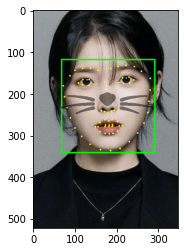

In [19]:
# 결과 이미지를 출력한다. 
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

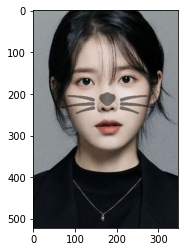

In [20]:
sticker_area=img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

**다른 각도의 사진**

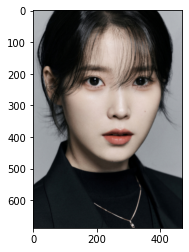

In [21]:
my_image_path = '/content/drive/MyDrive/camera_sticker/images/2.png'
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
plt.imshow(img_rgb)
plt.show()

In [23]:
# detector를 선언한다.
detector_hog = dlib.get_frontal_face_detector()

# bounding box를 추출한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)

rectangles[[(98, 134) (419, 455)]]


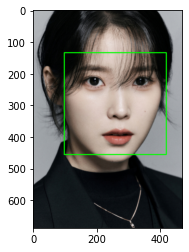

In [24]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [25]:
model_path = '/content/drive/MyDrive/camera_sticker/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [26]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아낸다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    #  face landmark 좌표를 저장해둔다.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


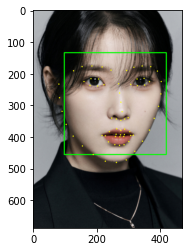

In [27]:
for landmark in list_landmarks:
  for point in landmark:
      cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [28]:
# 좌표 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])   # 코의 index는 30이다.
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d, %d)'%(x,y))
    print('(w,h) : (%d, %d)'%(w,h))

(280, 320)
(x,y) : (280, 159)
(w,h) : (322, 322)


In [29]:
sticker_path = '/content/drive/MyDrive/camera_sticker/sticker.png'
img_sticker = cv2.imread(sticker_path)  # 스티커 이미지를 불러온다.
img_sticker = cv2.resize(img_sticker,(w,h))
print(img_sticker.shape)

(322, 322, 3)


In [30]:
refined_x = x - w // 2
refined_y = h - y
print('(x,y) : (%d, %d)'%(refined_x, refined_y))

(x,y) : (119, 163)


In [31]:
# -y 크기만큼 이미지를 자르고 경계값을 0으로 설정해준다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[- refined_y:, :]
    refined_y = 0

print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (119,163)


In [32]:
# 원본 이미지에 스티커를 적용한다.
# img_show[from:to] 형식이다.
# cv2.addWeighted()함수를 이용한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

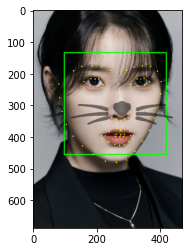

In [33]:
# 결과 이미지를 출력한다. 
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

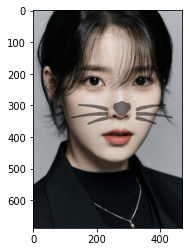

In [34]:
sticker_area=img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

✍ 회고

* 정면 사진과 측면 사진을 이용해서 얼굴의 각도를 달리하여 프로젝트를 진행하였다. 측면 사진이 정면 사진에서 조금 각도가 생긴 정도라 픽셀을 인지하는 것에 큰 문제가 발생하지 않은 것으로 보인다. 만약 얼굴의 각도가 틀어진 정도가 커지고 픽셀을 인지하는 것에 어려움이 생긴다면, 해상도를 높이는 방법을 고려해볼 수 있다.

* 촬영거리를 고려하여 프로젝트를 진행하진 않았지만, 촬영거리가 생기면 눈, 코, 입 등 얼굴의 특징적인 부위를 인식하는 것이 제대로 인지되지 않아 bounding box 작동에 문제가 생길 것으로 예상된다.

* 이미지 밝기를 달리하여 진행하지 않았지만, 어두울수록 픽섹을 인지하는 것이 힘들 것이라 예상하였다. 하지만 다른 분들의 자료를 보면 딱히 픽셀 인지에 문제가 되지 않는 것으로 보인다.

* open cv는 bgr 순으로 읽기 때문에 rbg로 변경하는 과정을 거쳐준다. 그리고 스티커 주변의 흰색 배경을 제거하기 위하여 img_sticker==255를 두고 진행하였다. 또한, opencv의 cv2.addWeighted()를 이용한 점이 있었다.

* 어플리케이션으로 사진에 자동으로 스티커를 씌우기만 했었는데, 직접 코드를 입력하면서 진행하니 새로웠다. 개발자의 고충도 간접적으로 느껴졌다. 극히 일부분의 고충이겠지만... 개발자는 위대하다...

* landmark 모델을 불러오면서 얼굴 영역 박스마다 face landmark를 찾아내는게 영화에서만 보던 장면 중 하나였다. 그래서 face landmark 좌표를 저장해두면서 픽셀을 인식하는 점이 더욱 재밌게 다가왔다. 더 나아가, 불투명도도 조절해보았고 제법 스티커앱의 기능을 갖추어본 것이 신기하다...